### Simple Linear Regression implementation using statsmodels and sklearn:-
1. Basic EDA on columns
2. Splitting the data into train and test using train_test_split function of sklearn
3. Training the model using statsmodels after adding the const(intercept) to the input data
4. Analysing the R square and P(F-Score) of the model and p-values of the intercept and slope
5. Plotting the model
6. Residual analysis - plotting histogram of residuals and scatterplot of input data vs residuals
7. Evaluating the model - if the R squared value of test predictions are with 5% of train R squared, its good
7. Training the model using sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


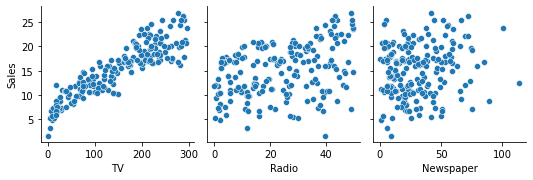

In [4]:
sns.pairplot(x_vars=["TV", "Radio", "Newspaper"], y_vars=["Sales"], data=df)
plt.show()

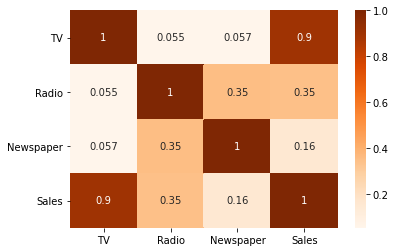

In [5]:
cov = df.corr()
sns.heatmap(cov, cmap="Oranges", annot=True)
plt.show()

#### Creating the input and target data from original dataset

In [6]:
# Create X and y
X = df["TV"]
y = df["Sales"]

In [7]:
# 70 - 30 split of data for train and test using pre built function of sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [8]:
X_train.shape

(140,)

### statsmodels linear regressor
1. by default, model does not include the intercept of model i.e. it is zero and non changing
2. you have to manually add the intercept of the line to make it learn its value

#### Adding the const value to the input data

In [9]:
# adding the const value 

X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


linear equation :- y = m * x + c<br>
const -> c<br>
TV -> x<br>
m is included in the model already

#### Training the model

In [10]:
# fitting the model 
lr_object = sm.OLS(y_train, X_train_sm)
model  = lr_object.fit()
model.params

const    6.948683
TV       0.054546
dtype: float64

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Mon, 24 Jan 2022   Prob (F-statistic):           1.52e-52
Time:                        20:32:06   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Observations:-
1. high R-squared value signifies that the model is able to explain 81% of variance of the input data points
2. If Low Prob(F-statistic) is lower than 0.05, the overall model is significant, according to hypothesis testing on model params
3. p values of individual coefficients is zeros which means that parameters are significant

#### Obtaining predictions

In [11]:
y_train_pred = model.predict(X_train_sm)

#### Plotting the model (red line are the predictions)

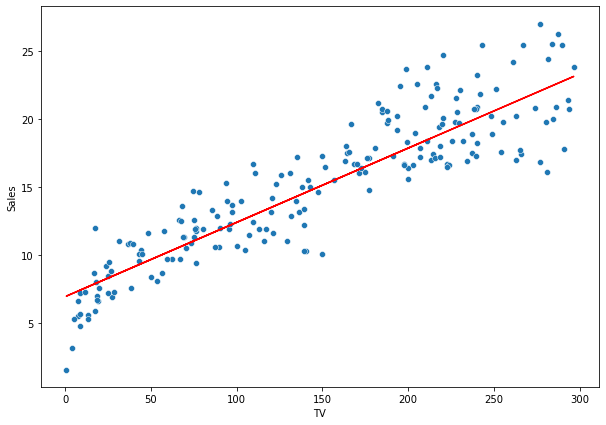

In [12]:
# plotting the model using parameters
plt.figure(figsize=[10, 7])
sns.scatterplot(X, y)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

#### Residual analysis - Linear Regression Test
1. the residuals(target - predictions) should be normally distributed - plot a histogram
2. look for patterns in residuals - plot a scatterplot of x_train vs residuals
3. You could also perform a hypothesis test to prove that B1(m) is significant or not<br>
If the model passes these tests, you could say that linear regression is a good model for the problem

In [13]:
res = y_train - y_train_pred

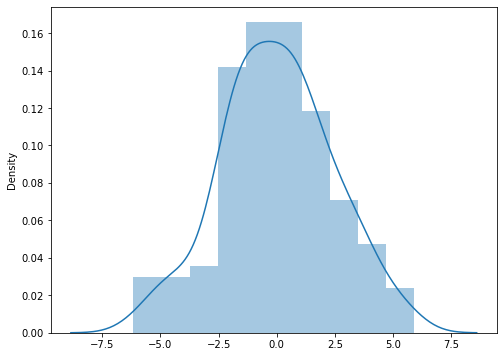

In [14]:
plt.figure(figsize=[8, 6])
sns.distplot(res)
plt.show()

The distribution is centered around zero and it is almost a normal distribution so its fine

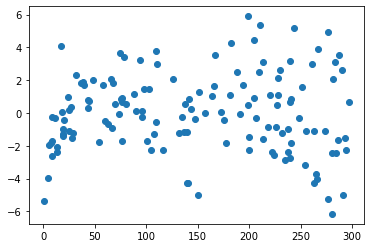

In [15]:
plt.scatter(X_train, res)
plt.show()

The distribution should normally be centered around zero, which it is and the spread is also not suspicious

#### Evaluating the model on the test set

In [16]:
X_test_sm = sm.add_constant(X_test)

y_test_pred = model.predict(X_test_sm)

In [17]:
# evaluate the model using r-squared
r2 = r2_score(y_test, y_test_pred)
r2

0.7921031601245658

R square of 79 percent on the test set is good enough when compared to 81 percent on the train set

### sklearn linear regressor

In [18]:
# making the data again with same random state

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [19]:
X_train.shape

(140,)

In [20]:
# reshaping the input from (140,) to (140, 1) 

X_train_lm = X_train.values.reshape(-1, 1)
X_test_lm = X_test.values.reshape(-1, 1)

In [21]:
# create a linear regression object

lm = LinearRegression()

lm.fit(X_train_lm, y_train)

LinearRegression()

In [23]:
# see the params

print(lm.coef_)
print(lm.intercept_)

[0.05454575]
6.94868320000136


In [24]:
# make predictions 

y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [25]:
# evaluate using r squared value

print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8157933136480388
0.792103160124566


### statsmodels v/s sklearn
1. const value has to be added in sm (not the case with skl)
2. summary is provided with sm model (not the case with skl)
3. comparatively less steps in skl than sm